In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
random_state = 48

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

features_names = load_breast_cancer(as_frame = True)['feature_names']

In [ ]:
from sklearn.pipeline import Pipeline

stand_scaler = StandardScaler()

ada_boost = GridSearchCV(AdaBoostClassifier(random_state = random_state), param_grid={"learning_rate": [0.1, 0.05, 0.01 ,0.5],"n_estimators": [50, 100, 200]})
random_forest = GridSearchCV(RandomForestClassifier(random_state = random_state), param_grid={"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7]})
decision_tree = GridSearchCV(DecisionTreeClassifier(random_state = random_state), param_grid={"max_depth": [3, 5, 7]})

classifiers = [decision_tree, random_forest, ada_boost]

In [ ]:
names = ["Decision Tree", "Random Forest", "Ada Boost"]
for (classifier, name) in zip(classifiers, names):
  classifier.fit(X_train, y_train)
  print(f"{name}\t Score: {classifier.score(X_test, y_test)} \t Best Params: {classifier.best_params_}", )

Decision Tree	 Score: 0.9473684210526315 	 Best Params: {'max_depth': 3}
Random Forest	 Score: 0.9649122807017544 	 Best Params: {'max_depth': 7, 'n_estimators': 50}
Ada Boost	 Score: 0.9649122807017544 	 Best Params: {'learning_rate': 0.1, 'n_estimators': 200}


In [ ]:
best_model = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1, random_state = 42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [ ]:
print(f"Chosen Estimator of AdaBoost: {best_model.estimator_}\n\n\n")
print(classification_report(y_test, y_pred))

Chosen Estimator of AdaBoost: DecisionTreeClassifier(max_depth=1)



              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



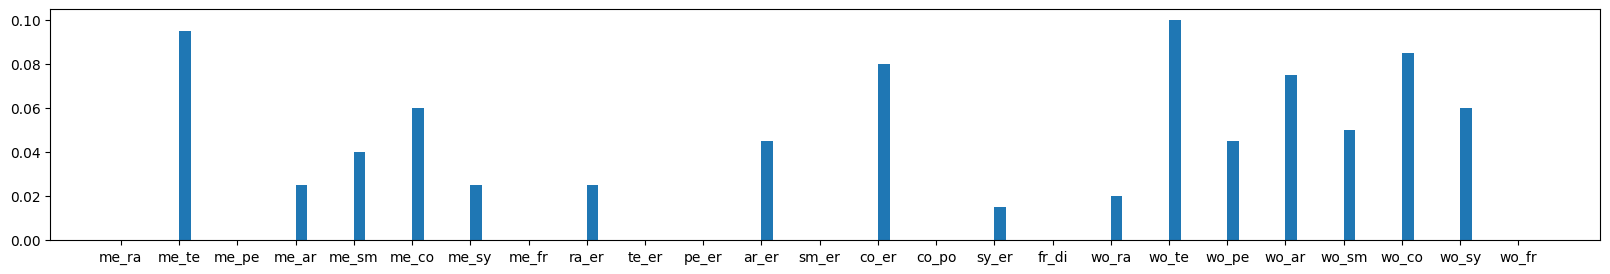

[0.    0.095 0.    0.025 0.04  0.05  0.    0.06  0.025 0.    0.025 0.
 0.    0.045 0.    0.08  0.    0.    0.015 0.    0.02  0.1   0.045 0.075
 0.05  0.025 0.085 0.08  0.06  0.   ]
1.0


In [ ]:
weights = best_model.feature_importances_

labeler = lambda l: l[0] + l[1] + "_" + l.split(' ')[1][0] + l.split(' ')[1][1]
pyplot.figure(figsize=(20,3))
pyplot.bar(list(map(labeler, features_names)), weights, align='edge', width=0.2)
pyplot.show()
print(weights)
print(weights.sum())

Agora irei remover as features menos importantes e retreinar o modelo. Com a remoção dos que tem 0 de importância, o modelo agiu como esperado e manteve os resultados. Então testarei removendo os que tem menos de 0.05 de importância.

In [ ]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

non_zero = np.nonzero(weights > 0.05)
df = sklearn_to_df(load_breast_cancer())
print(non_zero)
df.head()

(array([ 1,  7, 15, 21, 23, 26, 27, 28]),)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
non_zero_cols = df.columns[non_zero[0]]
df[non_zero_cols].head()

,mean texture,mean concave points,compactness error,worst texture,worst area,worst concavity,worst concave points,worst symmetry
0,10.38,0.14710,0.04904,17.33,2019.0,0.7119,0.2654,0.4601
1,17.77,0.07017,0.01308,23.41,1956.0,0.2416,0.1860,0.2750
2,21.25,0.12790,0.04006,25.53,1709.0,0.4504,0.2430,0.3613
3,20.38,0.10520,0.07458,26.50,567.7,0.6869,0.2575,0.6638
4,14.34,0.10430,0.02461,16.67,1575.0,0.4000,0.1625,0.2364


In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df[non_zero_cols], df['target'], train_size=0.8, test_size=0.2, random_state=42)

names = ["Decision Tree", "Random Forest", "Ada Boost"]
for (classifier, name) in zip(classifiers, names):
  classifier.fit(X_train_2, y_train_2)
  print(f"{name}\t Score: {classifier.score(X_test_2, y_test_2)} \t Best Params: {classifier.best_params_}", )

Decision Tree	 Score: 0.9385964912280702 	 Best Params: {'max_depth': 3}
Random Forest	 Score: 0.956140350877193 	 Best Params: {'max_depth': 7, 'n_estimators': 50}
Ada Boost	 Score: 0.9473684210526315 	 Best Params: {'learning_rate': 0.1, 'n_estimators': 100}


In [174]:

best_model_2 = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1, random_state = 42)
best_model_2.fit(X_train_2, y_train_2)
y_pred_2 = best_model_2.predict(X_test_2)

print(f"Chosen Estimator of AdaBoost: {best_model_2.estimator_}\n\n\n")
print(classification_report(y_test_2, y_pred_2))

Chosen Estimator of AdaBoost: DecisionTreeClassifier(max_depth=1)



              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
print(X_train.shape, X_train_2.shape)

(455, 30) (455, 8)


Ao remover as features que aparentavam não importar tanto para o problema temos o mesmo resultado, então as features mais importantes não variam com as menos importantes ou variam pouco. O nível de correlação entre as variáveis é baixo.